<a href="https://colab.research.google.com/github/ravitejagvs/myibm/blob/master/Covid_medical_centers_district_wise_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

As of now, the biggest question around the Globe yet to be answered is

"Which Country will be getting the highest share of COVID19 vaccine first?"

Boiling down the question to India - with 17.7% share of World's population, and around 5% of World's active COVID19 cases, it is still an Einstein riddle to solve.

In this project we are going to study the number of live cases as on date  across the Sub-continent - India, and cluster each district as per the availability of COVID hospitals and medical centers.

The purpose of this study would be to analyse availability of vaccine to the entire Country, to categorise the Country priority wise, to curb the day-by-day increase in number of infections due to inter state travel, community transfer and so on. Few questions as of now are not yet answered, and hece assumed, like the cost of the vaccine and availability.

To keep it simple, all hospitals are considered as active COVID19 treating hospitals.  Also, this study is to analyse which district should receive the vaccine first to curb the overall spread of number of cases, but due to unavailability of data of community spread and inter district travel we are restricting our study.

Assumptions:

To avoid commercialising the Pandemic, I've assumed that vaccine is sold only at hospitals catering to live patients first, to treate patients across all hospitals at an affordable cost of 1000 INR. Comment your views on the same

Datasets used:

1.   COVID 19 tracker India dataset (https://api.covid19india.org/v2/state_district_wise)
2.   District wise population sensex (https://github.com/ravitejagvs/covid19)
3.   Latitude and Longitude from geopy
4.   Foursquare API for venuecategories : Hospital and Medical centers
5.   Folium for maps

Footnotes:

https://www.washingtonpost.com/health/2020/06/04/biggest-challenge-coronavirus-vaccine-could-be-getting-countries-share/

Challen

---



In [87]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from pandas.io.json import json_normalize
import requests
import json

from geopy.geocoders import Nominatim
from sklearn.cluster import KMeans
import folium

In [88]:
response = requests.get('https://api.covid19india.org/v2/state_district_wise.json')
content = response.content
parsed = json.loads(content)
len(parsed)

37

In [89]:
dfs = []

for i in parsed:
#     print(i['state'])
    state_name = i['state']
    state_code = i['statecode']
    
#     df = pd.DataFrame()

    df = pd.DataFrame(i['districtData'])
    df['state name'] = state_name
    df['state code'] = state_code
    
    dfs.append(df)

In [90]:
district_level = pd.concat(dfs)

In [91]:
len(district_level)

773

In [92]:
covid_KA=district_level[(district_level['district']!='Unknown') & (district_level['district']!='Other State')& (district_level['district']!='Unassigned') & (district_level['district']!='Foreign Evacuees')& (district_level['district']!='Airport Quarantine')]
covid_KA

,district,notes,active,confirmed,deceased,recovered,delta,state name,state code
0,Nicobars,District-wise numbers are out-dated as cumulat...,0,0,0,0,"{'confirmed': 0, 'deceased': 0, 'recovered': 0}",Andaman and Nicobar Islands,AN
1,North and Middle Andaman,District-wise numbers are out-dated as cumulat...,0,1,0,1,"{'confirmed': 0, 'deceased': 0, 'recovered': 0}",Andaman and Nicobar Islands,AN
2,South Andaman,District-wise numbers are out-dated as cumulat...,19,51,0,32,"{'confirmed': 0, 'deceased': 0, 'recovered': 0}",Andaman and Nicobar Islands,AN
1,Anantapur,,269,66654,588,65797,"{'confirmed': 0, 'deceased': 0, 'recovered': 0}",Andhra Pradesh,AP
2,Chittoor,,573,83579,825,82181,"{'confirmed': 0, 'deceased': 0, 'recovered': 0}",Andhra Pradesh,AP
...,...,...,...,...,...,...,...,...,...
19,Purba Bardhaman,,692,10226,84,9450,"{'confirmed': 0, 'deceased': 0, 'recovered': 0}",West Bengal,WB
20,Purba Medinipur,,715,17893,234,16944,"{'confirmed': 0, 'deceased': 0, 'recovered': 0}",West Bengal,WB
21,Purulia,,213,6071,38,5820,"{'confirmed': 0, 'deceased': 0, 'recovered': 0}",West Bengal,WB
22,South 24 Parganas,,1608,31484,560,29316,"{'confirmed': 0, 'deceased': 0, 'recovered': 0}",West Bengal,WB


In [93]:
covid_KA.drop(["delta","notes"],axis=1,inplace=True)
covid_KA.drop(["recovered","confirmed"],axis=1,inplace=True)
covid_KA

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,district,active,deceased,state name,state code
0,Nicobars,0,0,Andaman and Nicobar Islands,AN
1,North and Middle Andaman,0,0,Andaman and Nicobar Islands,AN
2,South Andaman,19,0,Andaman and Nicobar Islands,AN
1,Anantapur,269,588,Andhra Pradesh,AP
2,Chittoor,573,825,Andhra Pradesh,AP
...,...,...,...,...,...
19,Purba Bardhaman,692,84,West Bengal,WB
20,Purba Medinipur,715,234,West Bengal,WB
21,Purulia,213,38,West Bengal,WB
22,South 24 Parganas,1608,560,West Bengal,WB


In [94]:
url = 'https://raw.githubusercontent.com/ravitejagvs/covid19/master/india-districts-census-2011.csv'
df_dist = pd.read_csv(url, error_bad_lines=False)

In [95]:
covid_KA.loc[covid_KA['district'] == 'Nicobars', ['district']] = 'Nicobar'
covid_KA.loc[covid_KA['district'] == 'S.P.S. Nellore', ['district']] = 'Nellore'
covid_KA.loc[covid_KA['district'] == 'Y.S.R. Kadapa', ['district']] = 'Kadapa'

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [96]:
covid_KA.head()

,district,active,deceased,state name,state code
0,Nicobar,0,0,Andaman and Nicobar Islands,AN
1,North and Middle Andaman,0,0,Andaman and Nicobar Islands,AN
2,South Andaman,19,0,Andaman and Nicobar Islands,AN
1,Anantapur,269,588,Andhra Pradesh,AP
2,Chittoor,573,825,Andhra Pradesh,AP


In [97]:
len(df_dist)
df_dist.head()

,District code,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,Male_SC,Female_SC,ST,Male_ST,Female_ST,Workers,Male_Workers,Female_Workers,Main_Workers,Marginal_Workers,Non_Workers,Cultivator_Workers,Agricultural_Workers,Household_Workers,Other_Workers,Hindus,Muslims,Christians,Sikhs,Buddhists,Jains,Others_Religions,Religion_Not_Stated,LPG_or_PNG_Households,Housholds_with_Electric_Lighting,Households_with_Internet,Households_with_Computer,Rural_Households,Urban_Households,Households,...,Main_source_of_drinking_water_Un_covered_well_Households,Main_source_of_drinking_water_Handpump_Tubewell_Borewell_Households,Main_source_of_drinking_water_Spring_Households,Main_source_of_drinking_water_River_Canal_Households,Main_source_of_drinking_water_Other_sources_Households,Main_source_of_drinking_water_Other_sources_Spring_River_Canal_Tank_Pond_Lake_Other_sources__Households,Location_of_drinking_water_source_Near_the_premises_Households,Location_of_drinking_water_source_Within_the_premises_Households,Main_source_of_drinking_water_Tank_Pond_Lake_Households,Main_source_of_drinking_water_Tapwater_Households,Main_source_of_drinking_water_Tubewell_Borehole_Households,Household_size_1_person_Households,Household_size_2_persons_Households,Household_size_1_to_2_persons,Household_size_3_persons_Households,Household_size_3_to_5_persons_Households,Household_size_4_persons_Households,Household_size_5_persons_Households,Household_size_6_8_persons_Households,Household_size_9_persons_and_above_Households,Location_of_drinking_water_source_Away_Households,Married_couples_1_Households,Married_couples_2_Households,Married_couples_3_Households,Married_couples_3_or_more_Households,Married_couples_4_Households,Married_couples_5__Households,Married_couples_None_Households,Power_Parity_Less_than_Rs_45000,Power_Parity_Rs_45000_90000,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
0,1,JAMMU AND KASHMIR,Kupwara,870354,474190,396164,439654,282823,156831,1048,1046,2,70352,36913,33439,229064,190899,38165,123837,105227,641290,34680,56759,7946,129679,37128,823286,1700,5600,66,39,13,2522,15828,83071,762,5256,158438,23226,181664,...,11127,5030,1902,24776,6597,34882,37849,22747,1607,50339,2066,911,4036,4947,6396,31982,10700,14886,42727,27121,46181,80569,14618,2218,2622,330,74,8968,259,494,94,588,71,101,172,74,10,84,15,1119
1,2,JAMMU AND KASHMIR,Badgam,753745,398041,355704,335649,207741,127908,368,343,25,23912,12383,11529,214866,162578,52288,132003,82863,538879,55299,36630,29102,93835,10110,736054,1489,5559,47,6,2,478,15118,90190,1999,5892,160649,27190,187839,...,699,9864,453,13064,1052,14705,33558,51358,136,73303,2321,845,2173,3018,3743,23640,7998,11899,59121,13440,14303,71441,15255,2962,3493,452,79,9030,201,436,126,562,72,89,161,96,28,124,18,1066
2,3,JAMMU AND KASHMIR,Leh(Ladakh),133487,78971,54516,93770,62834,30936,488,444,44,95857,47543,48314,75079,53265,21814,57125,17954,58408,20869,1645,1020,51545,22882,19057,658,1092,88635,103,54,1006,13645,17250,574,2150,36920,17474,54394,...,64,5991,620,6115,1565,8355,10962,3031,55,6254,135,1630,1483,3113,2302,10528,4422,3804,5378,1758,6784,12742,3492,716,835,87,32,3708,33,76,46,122,15,22,37,20,14,34,17,242
3,4,JAMMU AND KASHMIR,Kargil,140802,77785,63017,86236,56301,29935,18,12,6,122336,62652,59684,51873,39839,12034,28941,22932,88929,8266,3763,1222,38622,10341,108239,604,1171,20126,28,4,289,3285,15824,235,1005,40370,7774,48144,...,1,3289,323,2641,907,4068,9218,1963,197,10769,19,689,834,1523,983,4991,1652,2356,6832,4866,7031,10366,3835,1252,1643,308,83,2368,39,87,27,114,12,18,30,19,3,22,7,214
4,5,JAMMU AND KASHMIR,Punch,476835,251899,224936,261724,163333,98391,556,406,150,176101,90274,85827,161393,117677,43716,73247,88146,315442,54264,31583,3930,71616,32604,

2011 Sensex has data from just 640 districts while there are 744 districts in COVID dataset. 

In [98]:
df_dist.head()

,District code,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,Male_SC,Female_SC,ST,Male_ST,Female_ST,Workers,Male_Workers,Female_Workers,Main_Workers,Marginal_Workers,Non_Workers,Cultivator_Workers,Agricultural_Workers,Household_Workers,Other_Workers,Hindus,Muslims,Christians,Sikhs,Buddhists,Jains,Others_Religions,Religion_Not_Stated,LPG_or_PNG_Households,Housholds_with_Electric_Lighting,Households_with_Internet,Households_with_Computer,Rural_Households,Urban_Households,Households,...,Main_source_of_drinking_water_Un_covered_well_Households,Main_source_of_drinking_water_Handpump_Tubewell_Borewell_Households,Main_source_of_drinking_water_Spring_Households,Main_source_of_drinking_water_River_Canal_Households,Main_source_of_drinking_water_Other_sources_Households,Main_source_of_drinking_water_Other_sources_Spring_River_Canal_Tank_Pond_Lake_Other_sources__Households,Location_of_drinking_water_source_Near_the_premises_Households,Location_of_drinking_water_source_Within_the_premises_Households,Main_source_of_drinking_water_Tank_Pond_Lake_Households,Main_source_of_drinking_water_Tapwater_Households,Main_source_of_drinking_water_Tubewell_Borehole_Households,Household_size_1_person_Households,Household_size_2_persons_Households,Household_size_1_to_2_persons,Household_size_3_persons_Households,Household_size_3_to_5_persons_Households,Household_size_4_persons_Households,Household_size_5_persons_Households,Household_size_6_8_persons_Households,Household_size_9_persons_and_above_Households,Location_of_drinking_water_source_Away_Households,Married_couples_1_Households,Married_couples_2_Households,Married_couples_3_Households,Married_couples_3_or_more_Households,Married_couples_4_Households,Married_couples_5__Households,Married_couples_None_Households,Power_Parity_Less_than_Rs_45000,Power_Parity_Rs_45000_90000,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
0,1,JAMMU AND KASHMIR,Kupwara,870354,474190,396164,439654,282823,156831,1048,1046,2,70352,36913,33439,229064,190899,38165,123837,105227,641290,34680,56759,7946,129679,37128,823286,1700,5600,66,39,13,2522,15828,83071,762,5256,158438,23226,181664,...,11127,5030,1902,24776,6597,34882,37849,22747,1607,50339,2066,911,4036,4947,6396,31982,10700,14886,42727,27121,46181,80569,14618,2218,2622,330,74,8968,259,494,94,588,71,101,172,74,10,84,15,1119
1,2,JAMMU AND KASHMIR,Badgam,753745,398041,355704,335649,207741,127908,368,343,25,23912,12383,11529,214866,162578,52288,132003,82863,538879,55299,36630,29102,93835,10110,736054,1489,5559,47,6,2,478,15118,90190,1999,5892,160649,27190,187839,...,699,9864,453,13064,1052,14705,33558,51358,136,73303,2321,845,2173,3018,3743,23640,7998,11899,59121,13440,14303,71441,15255,2962,3493,452,79,9030,201,436,126,562,72,89,161,96,28,124,18,1066
2,3,JAMMU AND KASHMIR,Leh(Ladakh),133487,78971,54516,93770,62834,30936,488,444,44,95857,47543,48314,75079,53265,21814,57125,17954,58408,20869,1645,1020,51545,22882,19057,658,1092,88635,103,54,1006,13645,17250,574,2150,36920,17474,54394,...,64,5991,620,6115,1565,8355,10962,3031,55,6254,135,1630,1483,3113,2302,10528,4422,3804,5378,1758,6784,12742,3492,716,835,87,32,3708,33,76,46,122,15,22,37,20,14,34,17,242
3,4,JAMMU AND KASHMIR,Kargil,140802,77785,63017,86236,56301,29935,18,12,6,122336,62652,59684,51873,39839,12034,28941,22932,88929,8266,3763,1222,38622,10341,108239,604,1171,20126,28,4,289,3285,15824,235,1005,40370,7774,48144,...,1,3289,323,2641,907,4068,9218,1963,197,10769,19,689,834,1523,983,4991,1652,2356,6832,4866,7031,10366,3835,1252,1643,308,83,2368,39,87,27,114,12,18,30,19,3,22,7,214
4,5,JAMMU AND KASHMIR,Punch,476835,251899,224936,261724,163333,98391,556,406,150,176101,90274,85827,161393,117677,43716,73247,88146,315442,54264,31583,3930,71616,32604,

In [99]:
df_dist_pop = df_dist[["District name", "Population", "Male", "Female", "Power_Parity_Less_than_Rs_45000","Power_Parity_Rs_45000_90000","Power_Parity_Rs_90000_150000",	"Power_Parity_Rs_45000_150000",	"Power_Parity_Rs_150000_240000",	"Power_Parity_Rs_240000_330000", 	"Power_Parity_Rs_150000_330000",	"Power_Parity_Rs_330000_425000",	"Power_Parity_Rs_425000_545000",	"Power_Parity_Rs_330000_545000",	"Power_Parity_Above_Rs_545000"]].copy()

In [100]:
df_covid =covid_KA.rename(columns={'district':'District name'})

In [101]:
merged_df = df_covid.merge(df_dist_pop, how = 'inner', on = ['District name'])

In [102]:
merged_df.head()

,District name,active,deceased,state name,state code,Population,Male,Female,Power_Parity_Less_than_Rs_45000,Power_Parity_Rs_45000_90000,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000
0,South Andaman,19,0,Andaman and Nicobar Islands,AN,238142,127283,110859,607,1649,1371,3020,649,368,1017,265,497,762,376
1,Anantapur,269,588,Andhra Pradesh,AP,4081148,2064495,2016653,969,2252,1605,3857,143,150,293,176,261,437,243
2,Chittoor,573,825,Andhra Pradesh,AP,4174064,2090204,2083860,1021,2270,1565,3835,261,125,386,157,218,375,307
3,East Godavari,3945,636,Andhra Pradesh,AP,5154296,2569688,2584608,1274,2865,1949,4814,189,164,353,195,286,481,290
4,Guntur,1361,648,Andhra Pradesh,AP,4887813,2440521,2447292,1119,2657,1953,4610,196,188,384,222,328,550,317


In [103]:
merged_df.shape

(550, 19)

Around 90 districts were not properly matched, let's get back to that later

## geopy geocoders

In [104]:
from geopy.geocoders import Nominatim

In [105]:
KA_Latitude = []
KA_Longitude = []

In [106]:
for address in  merged_df['District name']:

  
  try:
    geolocator = Nominatim(user_agent="my-application")
    location = geolocator.geocode(address)
    latitude = location.latitude
    KA_Latitude.append('{:0.2f}'.format(latitude))
    longitude = location.longitude
    KA_Longitude.append('{:0.2f}'.format(longitude))
    #print(address)
    #print('The geograpical coordinates are {:0.2f}, {:0.2f}.'.format(latitude, longitude))
  except:
    KA_Latitude.append('NA')
    KA_Longitude.append('NA')
  

In [107]:
merged_df.shape

(550, 19)

In [108]:
merged_df['Latitude'] = KA_Latitude
merged_df['Longitude'] = KA_Longitude

In [109]:
merged_df.shape

(550, 21)

In [110]:
merged_df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

,District name,active,deceased,state name,state code,Population,Male,Female,Power_Parity_Less_than_Rs_45000,Power_Parity_Rs_45000_90000,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Latitude,Longitude
0,South Andaman,19,0,Andaman and Nicobar Islands,AN,238142,127283,110859,607,1649,1371,3020,649,368,1017,265,497,762,376,10.71,92.49
1,Anantapur,269,588,Andhra Pradesh,AP,4081148,2064495,2016653,969,2252,1605,3857,143,150,293,176,261,437,243,14.65,77.56
2,Chittoor,573,825,Andhra Pradesh,AP,4174064,2090204,2083860,1021,2270,1565,3835,261,125,386,157,218,375,307,13.16,79.16
3,East Godavari,3945,636,Andhra Pradesh,AP,5154296,2569688,2584608,1274,2865,1949,4814,189,164,353,195,286,481,290,17.23,81.72
4,Guntur,1361,648,Andhra Pradesh,AP,4887813,2440521,2447292,1119,2657,1953,4610,196,188,384,222,328,550,317,16.29,80.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,Murshidabad,380,120,West Bengal,WB,7103807,3627564,3476243,1645,3099,1663,4762,597,268,865,220,441,661,153,24.17,88.27
546,Nadia,1069,223,West Bengal,WB,5167600,2653768,2513832,1160,2429,1520,3949,675,321,996,237,466,703,240,23.48,88.56
547,Paschim Medinipur,578,252,West Bengal,WB,5913457,3007885,2905572,1321,2679,1404,4083,614,214,828,122,251,373,224,22.36,87.41
548,Purba Medinipur,715,234,West Bengal,WB,5095875,2629834,2466041,1140,2327,1220,3547,543,187,730,106,216,322,197,22.06,87.75


In [111]:
merged_df['Latitude'].isna().sum()

0

In [112]:
df_hospitals = merged_df.loc[merged_df['Latitude'] != 'NA']

In [113]:
df_hospitals['Latitude'] = pd.to_numeric(df_hospitals['Latitude'], downcast="integer")
df_hospitals['Longitude'] = pd.to_numeric(df_hospitals['Longitude'], downcast="integer")
df_hospitals['Latitude']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0      10.71
1      14.65
2      13.16
3      17.23
4      16.29
       ...  
545    24.17
546    23.48
547    22.36
548    22.06
549    25.87
Name: Latitude, Length: 544, dtype: float64

In [114]:
df_unique = df_hospitals.drop_duplicates(subset={'District name','Population'} )

In [115]:
df_unique.shape

(535, 21)

In [116]:
#df_covid_similar = df_hospitals[df_hospitals[['Latitude','Longitude']].duplicated()]
#df_covid_similar

14 values with similar latitude and longitude co-ordinates. We should combine them to prevent duplicaction

In [119]:
#df_covid.to_csv["dataframe_update.csv", index=False]

df_unique.to_csv('my_csv.csv', mode='a', header=True)

In [118]:
df_unique.head()

,District name,active,deceased,state name,state code,Population,Male,Female,Power_Parity_Less_than_Rs_45000,Power_Parity_Rs_45000_90000,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Latitude,Longitude
0,South Andaman,19,0,Andaman and Nicobar Islands,AN,238142,127283,110859,607,1649,1371,3020,649,368,1017,265,497,762,376,10.71,92.49
1,Anantapur,269,588,Andhra Pradesh,AP,4081148,2064495,2016653,969,2252,1605,3857,143,150,293,176,261,437,243,14.65,77.56
2,Chittoor,573,825,Andhra Pradesh,AP,4174064,2090204,2083860,1021,2270,1565,3835,261,125,386,157,218,375,307,13.16,79.16
3,East Godavari,3945,636,Andhra Pradesh,AP,5154296,2569688,2584608,1274,2865,1949,4814,189,164,353,195,286,481,290,17.23,81.72
4,Guntur,1361,648,Andhra Pradesh,AP,4887813,2440521,2447292,1119,2657,1953,4610,196,188,384,222,328,550,317,16.29,80.45


In [32]:
#df_unique = pd.read_csv("/content/my_csv_final.csv", error_bad_lines=False)

In [33]:
df_unique

,District name,active,deceased,state name,state code,Population,Male,Female,Power_Parity_Less_than_Rs_45000,Latitude,Longitude
0,South Andaman,19,0,Andaman and Nicobar Islands,AN,238142,127283,110859,607,10.71,92.49
1,Anantapur,269,588,Andhra Pradesh,AP,4081148,2064495,2016653,969,14.65,77.56
2,Chittoor,573,825,Andhra Pradesh,AP,4174064,2090204,2083860,1021,13.16,79.16
3,East Godavari,3945,636,Andhra Pradesh,AP,5154296,2569688,2584608,1274,17.23,81.72
4,Guntur,1361,648,Andhra Pradesh,AP,4887813,2440521,2447292,1119,16.29,80.45
...,...,...,...,...,...,...,...,...,...,...,...
545,Murshidabad,380,120,West Bengal,WB,7103807,3627564,3476243,1645,24.17,88.27
546,Nadia,1069,223,West Bengal,WB,5167600,2653768,2513832,1160,23.48,88.56
547,Paschim Medinipur,578,252,West Bengal,WB,5913457,3007885,2905572,1321,22.36,87.41
548,Purba Medinipur,715,234,West Bengal,WB,5095875,2629834,2466041,1140,22.06,87.75


Let's try if we can pull hospitals around 100km range for each centroid using foursquare, I'm not sure.

In [120]:
CLIENT_ID = 'CWO1LL1IQ2E1X303BQXMEE5JXBMLQXVZD1EPXC444EOQZJRP' 
CLIENT_SECRET = 'DNY15FSEA4M1O01HH3AUFMR3VETDUUO1NH1PCJY55CRDHSAB' 
VERSION = '20180604'
print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)
radius=100000 #40 km
LIMIT=100

Your credentials:
CLIENT_ID: CWO1LL1IQ2E1X303BQXMEE5JXBMLQXVZD1EPXC444EOQZJRP
CLIENT_SECRET:DNY15FSEA4M1O01HH3AUFMR3VETDUUO1NH1PCJY55CRDHSAB


In [35]:

# add markers to map


In [122]:
from pandas.io.json import json_normalize
import json

venues = []

for lat, long, dist, conf, state, pow1,pow2,pow3,pow4,pow5,pow6,pow7,pow8,pow9,pow10,pow11, deaths in zip(df_unique['Latitude'], df_unique['Longitude'], df_unique['District name'], df_unique['active'], df_unique['Population'], df_unique['Power_Parity_Less_than_Rs_45000'], df_unique['Power_Parity_Rs_45000_90000'], df_unique['Power_Parity_Rs_90000_150000'],df_unique['Power_Parity_Rs_45000_150000'], df_unique['Power_Parity_Rs_150000_240000'],df_unique['Power_Parity_Rs_240000_330000'], df_unique['Power_Parity_Rs_150000_330000'],df_unique['Power_Parity_Rs_330000_425000'], df_unique['Power_Parity_Rs_425000_545000'],df_unique['Power_Parity_Rs_330000_545000'], df_unique['Power_Parity_Above_Rs_545000'], df_unique['deceased']):
    try:
      url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        "4bf58dd8d48988d104941735",
        radius, 
        LIMIT)
    
      results = requests.get(url).json()["response"]['groups'][0]['items']
      print(url)
    
    except KeyError:
      pass

    for venue in results:
        venues.append((
            dist, 
            conf,
            state,
            pow1,
            pow2,
            pow3,
            pow4,
            pow5,
            pow6,
            pow7,
            pow8,
            pow9,
            pow10,
            pow11,
            deaths,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng']))
  

https://api.foursquare.com/v2/venues/explore?client_id=CWO1LL1IQ2E1X303BQXMEE5JXBMLQXVZD1EPXC444EOQZJRP&client_secret=DNY15FSEA4M1O01HH3AUFMR3VETDUUO1NH1PCJY55CRDHSAB&v=20180604&ll=10.71,92.49&categoryId=4bf58dd8d48988d104941735&radius=100000&limit=100
https://api.foursquare.com/v2/venues/explore?client_id=CWO1LL1IQ2E1X303BQXMEE5JXBMLQXVZD1EPXC444EOQZJRP&client_secret=DNY15FSEA4M1O01HH3AUFMR3VETDUUO1NH1PCJY55CRDHSAB&v=20180604&ll=14.65,77.56&categoryId=4bf58dd8d48988d104941735&radius=100000&limit=100
https://api.foursquare.com/v2/venues/explore?client_id=CWO1LL1IQ2E1X303BQXMEE5JXBMLQXVZD1EPXC444EOQZJRP&client_secret=DNY15FSEA4M1O01HH3AUFMR3VETDUUO1NH1PCJY55CRDHSAB&v=20180604&ll=13.16,79.16&categoryId=4bf58dd8d48988d104941735&radius=100000&limit=100
https://api.foursquare.com/v2/venues/explore?client_id=CWO1LL1IQ2E1X303BQXMEE5JXBMLQXVZD1EPXC444EOQZJRP&client_secret=DNY15FSEA4M1O01HH3AUFMR3VETDUUO1NH1PCJY55CRDHSAB&v=20180604&ll=17.23,81.72&categoryId=4bf58dd8d48988d104941735&radius=10000

In [123]:
venues_df = pd.DataFrame(venues)

In [125]:
venues_df.to_csv('venues_csv.csv', mode='a', header=True)

In [126]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [127]:
venues_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,Anantapur,269,4081148,969,2252,1605,3857,143,150,293,176,261,437,243,588,14.65,77.56,Ravi Teja Hospital,14.679800,77.601000
1,Anantapur,269,4081148,969,2252,1605,3857,143,150,293,176,261,437,243,588,14.65,77.56,vijaya nursing home,14.665072,77.609679
2,Anantapur,269,4081148,969,2252,1605,3857,143,150,293,176,261,437,243,588,14.65,77.56,sreenivasa Multi Specialty Hospital,14.678478,77.603951
3,Anantapur,269,4081148,969,2252,1605,3857,143,150,293,176,261,437,243,588,14.65,77.56,клиника доктора Рао,14.154075,77.810811
4,Anantapur,269,4081148,969,2252,1605,3857,143,150,293,176,261,437,243,588,14.65,77.56,Vishwa Jyoti Clinic,13.983854,77.766937


In [129]:
venues_df.columns = ['District', 'Cases', 'Population', 'pow1','pow2','pow3','pow4','pow5','pow6','pow7','pow8','pow9','pow10','pow11','deaths', 'Latitude', 'Longitude', 'VenueName', 'VenueLatitude', 'VenueLongitude']

In [ ]:
#ignore tjhhis
for lat, lng, con, dist, pow in zip(df_covid['Latitude'], df_covid['Longitude'], df_covid['confirmed'], df_covid['district'], df_covid['Power_Parity_Less_than_Rs_45000']):
    label = '{}, {}'.format(con, dist)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc').add_to(map_KA)  
    
map_KA

In [130]:
venues_df.head()

,District,Cases,Population,pow1,pow2,pow3,pow4,pow5,pow6,pow7,pow8,pow9,pow10,pow11,deaths,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude
0,Anantapur,269,4081148,969,2252,1605,3857,143,150,293,176,261,437,243,588,14.65,77.56,Ravi Teja Hospital,14.679800,77.601000
1,Anantapur,269,4081148,969,2252,1605,3857,143,150,293,176,261,437,243,588,14.65,77.56,vijaya nursing home,14.665072,77.609679
2,Anantapur,269,4081148,969,2252,1605,3857,143,150,293,176,261,437,243,588,14.65,77.56,sreenivasa Multi Specialty Hospital,14.678478,77.603951
3,Anantapur,269,4081148,969,2252,1605,3857,143,150,293,176,261,437,243,588,14.65,77.56,клиника доктора Рао,14.154075,77.810811
4,Anantapur,269,4081148,969,2252,1605,3857,143,150,293,176,261,437,243,588,14.65,77.56,Vishwa Jyoti Clinic,13.983854,77.766937


In [131]:
venues_df = venues_df.dropna(axis=1)

In [132]:
venues_df['count'] = venues_df.groupby('District')['District'].transform('count')
venues_df

,District,Cases,Population,pow1,pow2,pow3,pow4,pow5,pow6,pow7,pow8,pow9,pow10,pow11,deaths,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,count
0,Anantapur,269,4081148,969,2252,1605,3857,143,150,293,176,261,437,243,588,14.65,77.56,Ravi Teja Hospital,14.679800,77.601000,22
1,Anantapur,269,4081148,969,2252,1605,3857,143,150,293,176,261,437,243,588,14.65,77.56,vijaya nursing home,14.665072,77.609679,22
2,Anantapur,269,4081148,969,2252,1605,3857,143,150,293,176,261,437,243,588,14.65,77.56,sreenivasa Multi Specialty Hospital,14.678478,77.603951,22
3,Anantapur,269,4081148,969,2252,1605,3857,143,150,293,176,261,437,243,588,14.65,77.56,клиника доктора Рао,14.154075,77.810811,22
4,Anantapur,269,4081148,969,2252,1605,3857,143,150,293,176,261,437,243,588,14.65,77.56,Vishwa Jyoti Clinic,13.983854,77.766937,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8971,Uttar Dinajpur,207,3007134,710,1306,641,1947,220,79,299,79,159,238,20,62,25.87,87.96,Debiganj Upazila Health Complex,26.116371,88.754919,9
8972,Uttar Dinajpur,207,3007134,710,1306,641,1947,220,79,299,79,159,238,20,62,25.87,87.96,Neuro Hospital Pvt. Ltd,26.453305,87.284299,9
8973,Uttar Dinajpur,207,3007134,710,1306,641,1947,220,79,299,79,159,238,20,62,25.87,87.96,Morang Cooperative,26.453044,87.278854,9
8974,Uttar Dinajpur,207,3007134,710,1306,641,1947,220,79,299,79,159,238,20,62,25.87,87.96,Dr Batra's Homeopathy,24.995022,88.141957,9


In [133]:

hospital_group = venues_df.groupby(["District"], as_index=False).agg(lambda x: ", ".join(x))

In [134]:
venues_df_group = venues_df.drop(columns=['VenueName'])
population_grouped = venues_df_group.groupby(["District"]).mean().reset_index()

In [135]:
population_grouped.head()

,District,Cases,Population,pow1,pow2,pow3,pow4,pow5,pow6,pow7,pow8,pow9,pow10,pow11,deaths,Latitude,Longitude,VenueLatitude,VenueLongitude,count
0,Adilabad,2437.0,2741239.0,648.0,1604.0,1266.0,2870.0,84.0,122.0,206.0,134.0,213.0,347.0,109.0,0.0,19.50,78.50,19.404933,78.702925,11.0
1,Agra,737.0,4418797.0,735.0,1846.0,1594.0,3440.0,359.0,471.0,830.0,326.0,298.0,624.0,354.0,164.0,27.18,78.01,27.336662,78.012487,41.0
2,Aizawl,179.0,400309.0,46.0,186.0,306.0,492.0,141.0,48.0,189.0,47.0,64.0,111.0,125.0,5.0,23.74,92.72,23.732935,92.716682,1.0
3,Ajmer,1133.0,2583052.0,372.0,1227.0,1280.0,2507.0,273.0,211.0,484.0,197.0,319.0,516.0,460.0,181.0,26.47,74.64,26.508277,74.620649,19.0
4,Akola,519.0,1813906.0,270.0,1059.0,871.0,1930.0,255.0,372.0,627.0,442.0,679.0,1121.0,0.0,349.0,20.76,77.19,20.586314,77.052968,14.0


In [66]:
hospital_group.head()

,District,VenueName
0,Adilabad,"Sridevi medical store, Shweta Multi speciality..."
1,Agra,"RichFeel Trichology Center, Hair Transplant Cl..."
2,Aizawl,Civil Hospital
3,Ajmer,"Mediscan Sonography Center, Doctor Anil jain (..."
4,Akola,"dava bazar, Vyawhare Eye Clinic, Gadge Nagar, ..."


In [136]:
population_grouped['VenueName'] = hospital_group['VenueName']

In [137]:
population_grouped.head()

,District,Cases,Population,pow1,pow2,pow3,pow4,pow5,pow6,pow7,pow8,pow9,pow10,pow11,deaths,Latitude,Longitude,VenueLatitude,VenueLongitude,count,VenueName
0,Adilabad,2437.0,2741239.0,648.0,1604.0,1266.0,2870.0,84.0,122.0,206.0,134.0,213.0,347.0,109.0,0.0,19.50,78.50,19.404933,78.702925,11.0,"Sridevi medical store, Shweta Multi speciality..."
1,Agra,737.0,4418797.0,735.0,1846.0,1594.0,3440.0,359.0,471.0,830.0,326.0,298.0,624.0,354.0,164.0,27.18,78.01,27.336662,78.012487,41.0,"RichFeel Trichology Center, Hair Transplant Cl..."
2,Aizawl,179.0,400309.0,46.0,186.0,306.0,492.0,141.0,48.0,189.0,47.0,64.0,111.0,125.0,5.0,23.74,92.72,23.732935,92.716682,1.0,Civil Hospital
3,Ajmer,1133.0,2583052.0,372.0,1227.0,1280.0,2507.0,273.0,211.0,484.0,197.0,319.0,516.0,460.0,181.0,26.47,74.64,26.508277,74.620649,19.0,"Mediscan Sonography Center, Doctor Anil jain (..."
4,Akola,519.0,1813906.0,270.0,1059.0,871.0,1930.0,255.0,372.0,627.0,442.0,679.0,1121.0,0.0,349.0,20.76,77.19,20.586314,77.052968,14.0,"dava bazar, Vyawhare Eye Clinic, Gadge Nagar, ..."


Dropping the columns which are not of interest

In [138]:
population_grouped = population_grouped.drop(columns=['VenueName', 'VenueLatitude', 'VenueLongitude'])

Let's try the map view on Folium to visualise each column of the dataframe

In [139]:
# create map of Toronto using latitude and longitude values
address = 'India'

geolocator = Nominatim(user_agent="my-application")
location = geolocator.geocode(address)
latitude =  round(location.latitude,2)
longitude = round(location.longitude,2)
print('The geograpical coordinate of India are {}, {}.'.format(latitude, longitude))

map_IND = folium.Map(location=[latitude, longitude], zoom_start=5)

map_IND


The geograpical coordinate of India are 22.35, 78.67.


In [140]:
population_grouped.head()

,District,Cases,Population,pow1,pow2,pow3,pow4,pow5,pow6,pow7,pow8,pow9,pow10,pow11,deaths,Latitude,Longitude,count
0,Adilabad,2437.0,2741239.0,648.0,1604.0,1266.0,2870.0,84.0,122.0,206.0,134.0,213.0,347.0,109.0,0.0,19.50,78.50,11.0
1,Agra,737.0,4418797.0,735.0,1846.0,1594.0,3440.0,359.0,471.0,830.0,326.0,298.0,624.0,354.0,164.0,27.18,78.01,41.0
2,Aizawl,179.0,400309.0,46.0,186.0,306.0,492.0,141.0,48.0,189.0,47.0,64.0,111.0,125.0,5.0,23.74,92.72,1.0
3,Ajmer,1133.0,2583052.0,372.0,1227.0,1280.0,2507.0,273.0,211.0,484.0,197.0,319.0,516.0,460.0,181.0,26.47,74.64,19.0
4,Akola,519.0,1813906.0,270.0,1059.0,871.0,1930.0,255.0,372.0,627.0,442.0,679.0,1121.0,0.0,349.0,20.76,77.19,14.0


In [141]:
map_IND = folium.Map(location=[latitude, longitude], zoom_start=5)

# add markers to map
for lat, lng, dist, popu, cases, hosp, power in zip(population_grouped['Latitude'], population_grouped['Longitude'], population_grouped['District'], population_grouped['Population'], population_grouped['Cases'], population_grouped['count'], population_grouped['pow1']):
    label = '{}, {}, {}, {}'.format(dist, cases, popu, hosp)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_IND)  
    
map_IND

# K-Means

Let's normalise the sample for K-Means

I'd want to categorise the dataset into High-Priority, Low-Priority and Medium Priority categories based on population density and number of cases per 100, and number of good hospitals available in 100km radius taking power parity into consideration.

In [142]:
population_grouped.head()

,District,Cases,Population,pow1,pow2,pow3,pow4,pow5,pow6,pow7,pow8,pow9,pow10,pow11,deaths,Latitude,Longitude,count
0,Adilabad,2437.0,2741239.0,648.0,1604.0,1266.0,2870.0,84.0,122.0,206.0,134.0,213.0,347.0,109.0,0.0,19.50,78.50,11.0
1,Agra,737.0,4418797.0,735.0,1846.0,1594.0,3440.0,359.0,471.0,830.0,326.0,298.0,624.0,354.0,164.0,27.18,78.01,41.0
2,Aizawl,179.0,400309.0,46.0,186.0,306.0,492.0,141.0,48.0,189.0,47.0,64.0,111.0,125.0,5.0,23.74,92.72,1.0
3,Ajmer,1133.0,2583052.0,372.0,1227.0,1280.0,2507.0,273.0,211.0,484.0,197.0,319.0,516.0,460.0,181.0,26.47,74.64,19.0
4,Akola,519.0,1813906.0,270.0,1059.0,871.0,1930.0,255.0,372.0,627.0,442.0,679.0,1121.0,0.0,349.0,20.76,77.19,14.0


In [143]:
#cols = ['Cases', 'Population', 'count', PowerParity]
population_grouped_test = population_grouped

population_grouped_test['Cases'] = population_grouped_test['Cases'].div(population_grouped_test['Cases'].sum(axis=0), axis=0)
population_grouped_test['Population'] = population_grouped_test['Population'].div(population_grouped_test['Population'].sum(axis=0), axis=0)
population_grouped_test['count'] = population_grouped_test['count'].div(population_grouped_test['count'].sum(axis=0), axis=0)
population_grouped_test['pow1'] = population_grouped_test['pow1'].div(population_grouped_test['pow1'].sum(axis=0), axis=0)
population_grouped_test['pow2'] = population_grouped_test['pow2'].div(population_grouped_test['pow2'].sum(axis=0), axis=0)
population_grouped_test['pow3'] = population_grouped_test['pow3'].div(population_grouped_test['pow3'].sum(axis=0), axis=0)
population_grouped_test['pow4'] = population_grouped_test['pow4'].div(population_grouped_test['pow4'].sum(axis=0), axis=0)
population_grouped_test['pow5'] = population_grouped_test['pow5'].div(population_grouped_test['pow5'].sum(axis=0), axis=0)
population_grouped_test['pow6'] = population_grouped_test['pow6'].div(population_grouped_test['pow6'].sum(axis=0), axis=0)
population_grouped_test['pow7'] = population_grouped_test['pow7'].div(population_grouped_test['pow7'].sum(axis=0), axis=0)
population_grouped_test['pow8'] = population_grouped_test['pow8'].div(population_grouped_test['pow8'].sum(axis=0), axis=0)
population_grouped_test['pow9'] = population_grouped_test['pow9'].div(population_grouped_test['pow9'].sum(axis=0), axis=0)
population_grouped_test['pow10'] = population_grouped_test['pow10'].div(population_grouped_test['pow10'].sum(axis=0), axis=0)
population_grouped_test['pow11'] = population_grouped_test['pow11'].div(population_grouped_test['pow11'].sum(axis=0), axis=0)
population_grouped_test['deaths'] = population_grouped_test['deaths'].div(population_grouped_test['deaths'].sum(axis=0), axis=0)

In [144]:
population_grouped_test.head()

,District,Cases,Population,pow1,pow2,pow3,pow4,pow5,pow6,pow7,pow8,pow9,pow10,pow11,deaths,Latitude,Longitude,count
0,Adilabad,0.004683,0.002924,0.003539,0.003611,0.003283,0.003459,0.000573,0.001148,0.000815,0.001373,0.001626,0.001518,0.000739,0.000000,19.50,78.50,0.001225
1,Agra,0.001416,0.004713,0.004014,0.004156,0.004134,0.004146,0.002449,0.004431,0.003282,0.003341,0.002275,0.002731,0.002400,0.001724,27.18,78.01,0.004568
2,Aizawl,0.000344,0.000427,0.000251,0.000419,0.000794,0.000593,0.000962,0.000452,0.000747,0.000482,0.000489,0.000486,0.000847,0.000053,23.74,92.72,0.000111
3,Ajmer,0.002177,0.002755,0.002032,0.002762,0.003320,0.003021,0.001862,0.001985,0.001914,0.002019,0.002436,0.002258,0.003119,0.001903,26.47,74.64,0.002117
4,Akola,0.000997,0.001935,0.001475,0.002384,0.002259,0.002326,0.001739,0.003499,0.002479,0.004530,0.005185,0.004905,0.000000,0.003669,20.76,77.19,0.001560


In [145]:
population_clustering = population_grouped_test.drop(["Latitude", "Longitude", "District"], 1)

Just check if the percentages are accurate

For adilabad : 2741239/1210854977 = 0.226%

PCA analysis for finding out the number of clusters

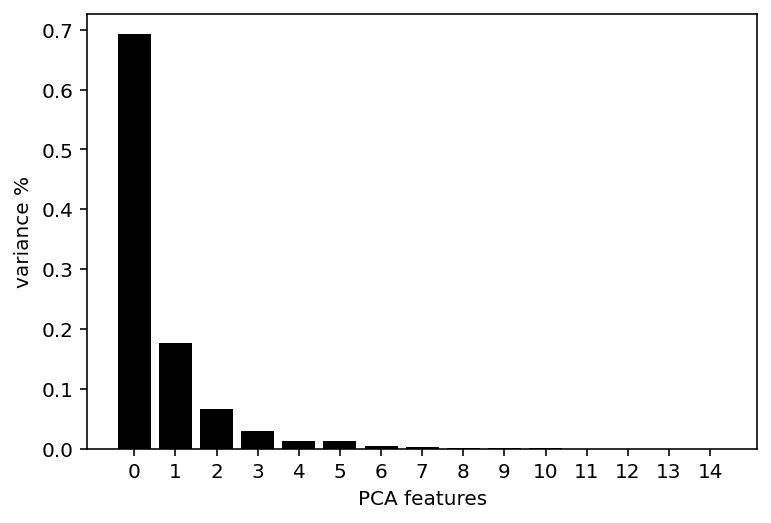

In [146]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%config InlineBackend.figure_format='retina'


pca = PCA(n_components=15)
principalComponents = pca.fit_transform(population_clustering)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

In [147]:
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(population_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:4]

array([0, 0, 0, 0], dtype=int32)

In [149]:
population_grouped["Cluster Labels"] = kmeans.labels_

In [150]:
#create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=5)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lng, dist, popu, cases, hosp, cluster in zip(population_grouped['Latitude'], population_grouped['Longitude'], population_grouped['District'], population_grouped['Population'], population_grouped['Cases'], population_grouped['count'], population_grouped_test["Cluster Labels"]):
    label = folium.Popup('{} ({}): {},{} - Cluster {}'.format(dist, popu, cases,hosp, cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [ ]:
population_grouped.head()

,District,Cases,Population,Latitude,Longitude,count,Cluster Labels
0,Adilabad,0.000205,0.002921,19.50,78.50,0.000495,3
1,Agra,0.000732,0.004708,27.18,78.01,0.002476,3
2,Aizawl,0.000130,0.000427,23.74,92.72,0.000330,3
3,Ajmer,0.000417,0.002752,26.47,74.64,0.001156,3
4,Akola,0.003558,0.001933,20.76,77.19,0.001321,3


In [ ]:
#Analysing clusters other than red: